In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
import cv2
from PIL import Image
import tempfile
import imutils
import numpy as np
import  matplotlib.pyplot as plt
from textblob import TextBlob
from ipynb.fs.defs .Text_Extraction import image_resize,set_image_dpi,remove_noise_and_smooth,text_rotation,croping_image,order_points,four_point_transform,get_text,sentiment_analysis,word_cloud,send_mail,text_2_speech
import smtplib
import os
import re

# Image Pre Processing

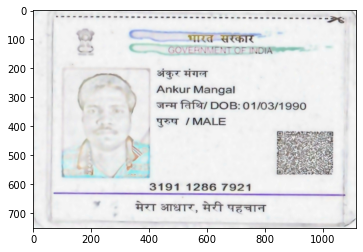

In [2]:
img3 = cv2.imread('aadhar.jpg')   


rgb_planes = cv2.split(img3)
result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((10, 10), np.uint8))        
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=250, norm_type=cv2.NORM_MINMAX,
                                                 dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
dst = cv2.fastNlMeansDenoisingColored(result_norm, None, 10, 10, 7, 11) 
plt.imshow(dst)

# Text Extraction

In [3]:
text = pytesseract.image_to_string(dst).upper().replace(" ", "")


date = str(re.findall(r"[\d]{1,4}[/-][\d]{1,4}[/-][\d]{1,4}", text)).replace("]", "").replace("[","").replace("'", "")

number = str(re.findall(r"[0-9]{11,12}", text)).replace("]", "").replace("[","").replace("'", "")
sex = str(re.findall(r"MALE|FEMALE", text)).replace("[","").replace("'", "").replace("]", "")
text1=text.split("\\")
name=text1[1].rstrip()

# Displaying Details in AADHAR CARD

In [4]:
print("NAME :",name)
print("Date of Birth :",date)
print("AADHAR NUMBER :",number)
print("SEX :",sex)

NAME : ANKURMANGAL
Date of Birth : 01/03/1990
AADHAR NUMBER : 319112867921
SEX : MALE


# Displaying Face in AADHAR CARD

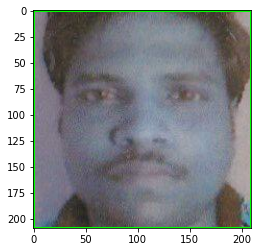

In [5]:
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 7)
for (x, y, w, h) in faces:
    ix = 0
    cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = img3[y:y + h, x:x + w]
    plt.imshow(roi_color)